#  Storm Guard
Robert Sloan <br>
5/23/2019 <br>
Replicating Al Zmyslowski's AAII CIMI Market Review - Technical & Economic Indicators<br>
StormGuard<br>
According to Al's notes Storm Guard is a 50 day Double Exponential Moving Average (DEMA(50)) of the daily deltas of the SPY with a 60 basis points offset.  Found at SumGrowth.com.  Has several variations like SG-Armour etc. Formally looked at at the end of the month but slow enough to look at daily. 0% is the lower limit

## load libraries

In [1]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#all matplotlib plots will be done inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [2]:
from pandas_datareader import data

### handle dates and times

In [3]:
import datetime
currentDT = datetime.datetime.now()
#print(str(currentDT))
todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-23


### get SPY adjusted close

count    2363.000000
mean      175.771939
std        59.182607
min        85.641502
25%       118.484879
50%       178.700760
75%       217.317558
max       294.029999
Name: Adj Close, dtype: float64

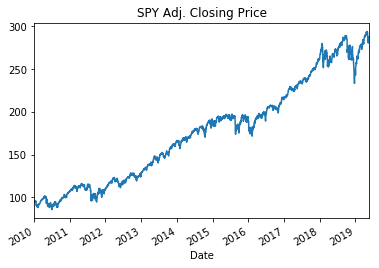

In [4]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


spy_data.plot(title='SPY Adj. Closing Price')# Convert the adjusted closing prices to cumulative returns.
spy_data.head()
spy_data.describe()

### Calculate 50 exponential moving average and double exponential moving averate

len(spy_50d_ema) 2363
ema_of_spy_50d_ema 2363
spy_50d_dema 2363


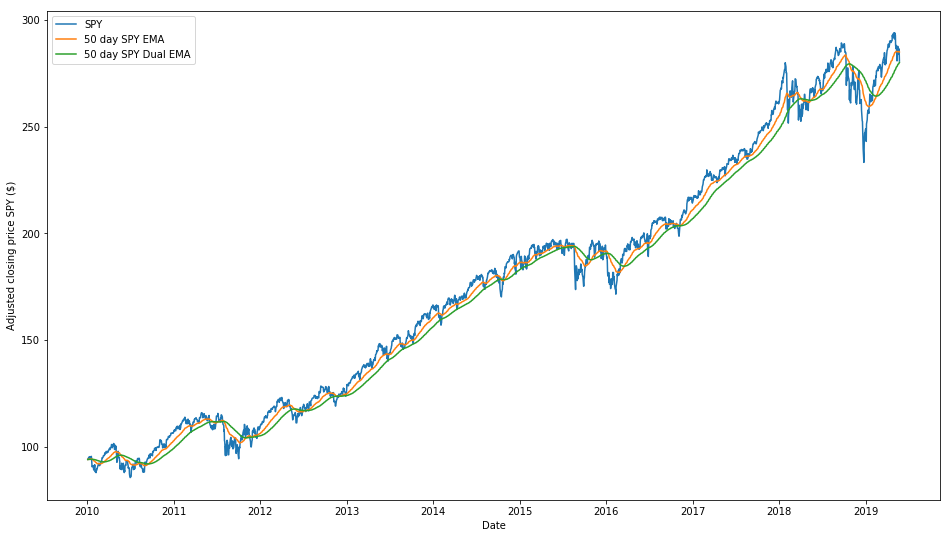

In [5]:
# Get the spy_data timeseries. This now returns a Pandas Series object indexed by date.

# Calculate the fifty day exponential moving average of the closing prices of the SPY
spy_50d_ema = spy_data.ewm(span=50, adjust=False).mean()

print("len(spy_50d_ema) " + str(len(spy_50d_ema)))
# Calculate the exponential moving average of the fifty day exponential moving average 
ema_of_spy_50d_ema = spy_50d_ema.ewm(span=50, adjust=False).mean()
print("ema_of_spy_50d_ema " + str(len(ema_of_spy_50d_ema)))

spy_50d_dema = 2*spy_50d_ema - ema_of_spy_50d_ema
print("spy_50d_dema " + str(len(spy_50d_dema)))
      

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(spy_50d_ema.index, spy_50d_ema, label='50 day SPY EMA')
ax.plot(ema_of_spy_50d_ema.index, ema_of_spy_50d_ema, label='50 day SPY Dual EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY ($)')
ax.legend()

### Create DataFrame with result

In [6]:
#indicators = pd.DataFrame([{'Technical Indicator': 'Stormguard', 'Type': 'Market Timer', 'Status': status_stormguard,
#                          'Value': str(stormguard_percent), 'Comment': "0% is lower limit"}], 
#                           columns=['Technical Indicator', 'Type', 'Status', 'Value', 'Comment'])
#indicators

### Output to Excel file

In [7]:
#writer = pd.ExcelWriter('indicator_sheet Stormguard.xlsx')
#indicators.to_excel(writer,'Indicators', index=False)
#writer.save()